# The Generation and Parameter Management for Excitation Time Series

This module will detail the generation and manipulation of our excitation time series data. The diversity of our $S^2$ data generation mechanisms is primarily due to two factors: (1) the diversity of generated symbolic expressions (complex systems) $f(\cdot)$; and (2) the diversity of generated excitation time series data $X$.

We incorporate five different excitation time series generation mechanisms into the [`Excitation`] object, including:

- [`MixedDistribution`](https://github.com/wwhenxuan/S2Generator/blob/main/S2Generator/excitation/mixed_distribution.py): Mainly from the field of symbolic regression [`SNIP`](https://arxiv.org/abs/2310.02227), this method is obtained by sampling from a mixture of Gaussian and uniform distributions.
- [`AutoregressiveMovingAverage`](https://github.com/wwhenxuan/S2Generator/blob/main/S2Generator/excitation/autoregressive_moving_average.py): This method comes from the field of time series analysis of [`SymTime`](), which constructs a stationary time series as the excitation signal by building a random parameterized ARMA model.
- [`ForecastPFN`](https://github.com/wwhenxuan/S2Generator/blob/main/S2Generator/excitation/forecast_pfn.py): This method is derived from [`ForecastPFN`](https://arxiv.org/abs/2311.01933), which is used to train zero-shot forecasting models on synthetic time series data. It considers time series data as a composition of trends and cycles based on the decomposition idea.
- [`KernelSynth`](https://github.com/wwhenxuan/S2Generator/blob/main/S2Generator/excitation/kernel_synth.py): This method comes from [`Chronos`](https://arxiv.org/abs/2403.07815) and generates excitation signals by constructing different periods and trends in the form of a combination of multiple different linear and nonlinear kernels.
- [`IntrinsicModeFunction`](https://github.com/wwhenxuan/S2Generator/blob/main/S2Generator/excitation/intrinsic_mode_functions.py): This method is based on the idea of signal decomposition in [`PySDKit`](https://github.com/wwhenxuan/PySDKit) and constructs the excitation signal by combining the eigenmode function with different signal and noise sequences.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from S2Generator import Excitation, SeriesParams
from S2Generator.excitation import (
    MixedDistribution,
    AutoregressiveMovingAverage,
    ForecastPFN,
    KernelSynth,
    IntrinsicModeFunction,
)

# Building a general interface to stimulate time series data generation
excitation = Excitation()  # Leave blank to use default parameters

print(excitation)

Excitation


We can generate stimulus time series data using the `__call__` method or the reserved `generate` method. The prerequisite is to pass in a random number generator with a specified random seed, and specify the length and dimension of the sequence.

In [2]:
# Create the random number generator in NumPy
rng = np.random.RandomState(42)

# Generate the Excitation Time Series
time_series, choice_list = excitation.generate(
    rng=rng, n_inputs_points=256, input_dimension=6, return_choice=True
)

print("The shape of the time series is:", time_series.shape)
print("The choice list is:", choice_list)

The shape of the time series is: (256, 6)
The choice list is: ['forecast_pfn' 'intrinsic_mode_function' 'kernel_synth' 'forecast_pfn'
 'autoregressive_moving_average' 'autoregressive_moving_average']


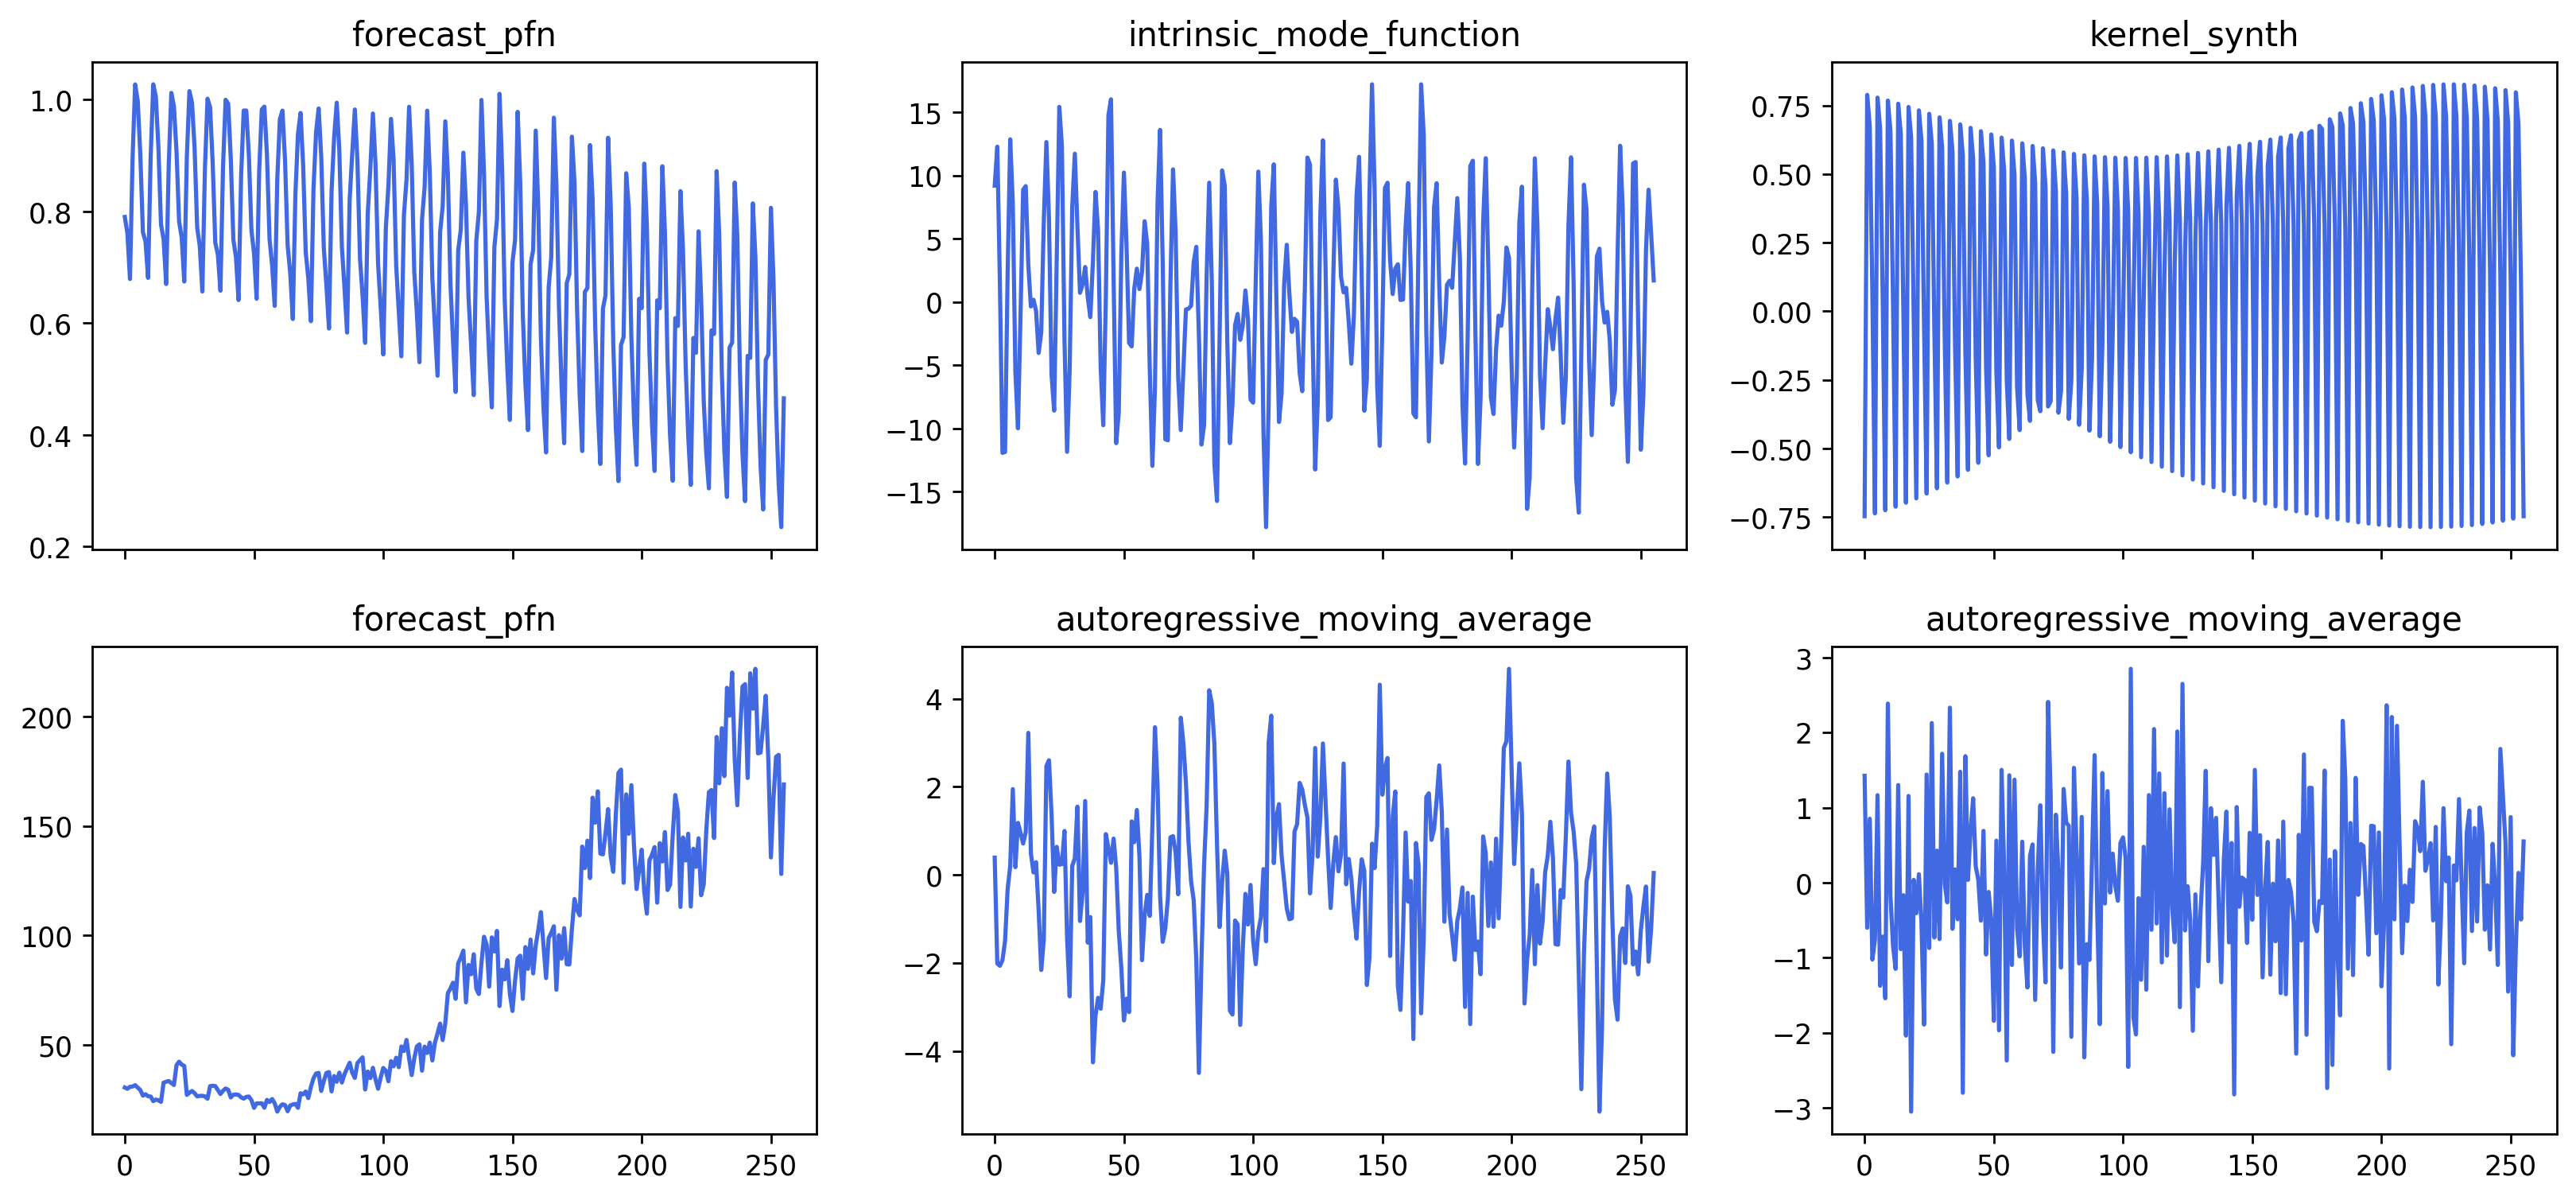

In [3]:
# Visualize the Generated time series data
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 7), dpi=250, sharex=True)

for i in range(2):
    for j in range(3):
        # Plotting the time series
        ax[i, j].plot(time_series[:, i * 3 + j], color="royalblue")
        # Mark the sampling type
        ax[i, j].set_title(choice_list[i * 3 + j])

During data generation, we randomly select one of five methods for each channel's time series based on a specified probability. Users can specify the probability of the selected method for generating the stimulus time series data using the `SeriesParams` parameter.

In [4]:
# The probability of artificially specifying the data generation method
series_params = SeriesParams(
    forecast_pfn=0.9,
    mixed_distribution=0.0,
    autoregressive_moving_average=0.0,
    kernel_synth=0.0,
    intrinsic_mode_function=0.1,
)

# Create the new generator for excitation
excitation = Excitation(series_params=series_params)

# Print the prob array for select
series_params.prob_array, excitation.prob_array

(array([0. , 0. , 0.9, 0. , 0.1]), array([0. , 0. , 0.9, 0. , 0.1]))

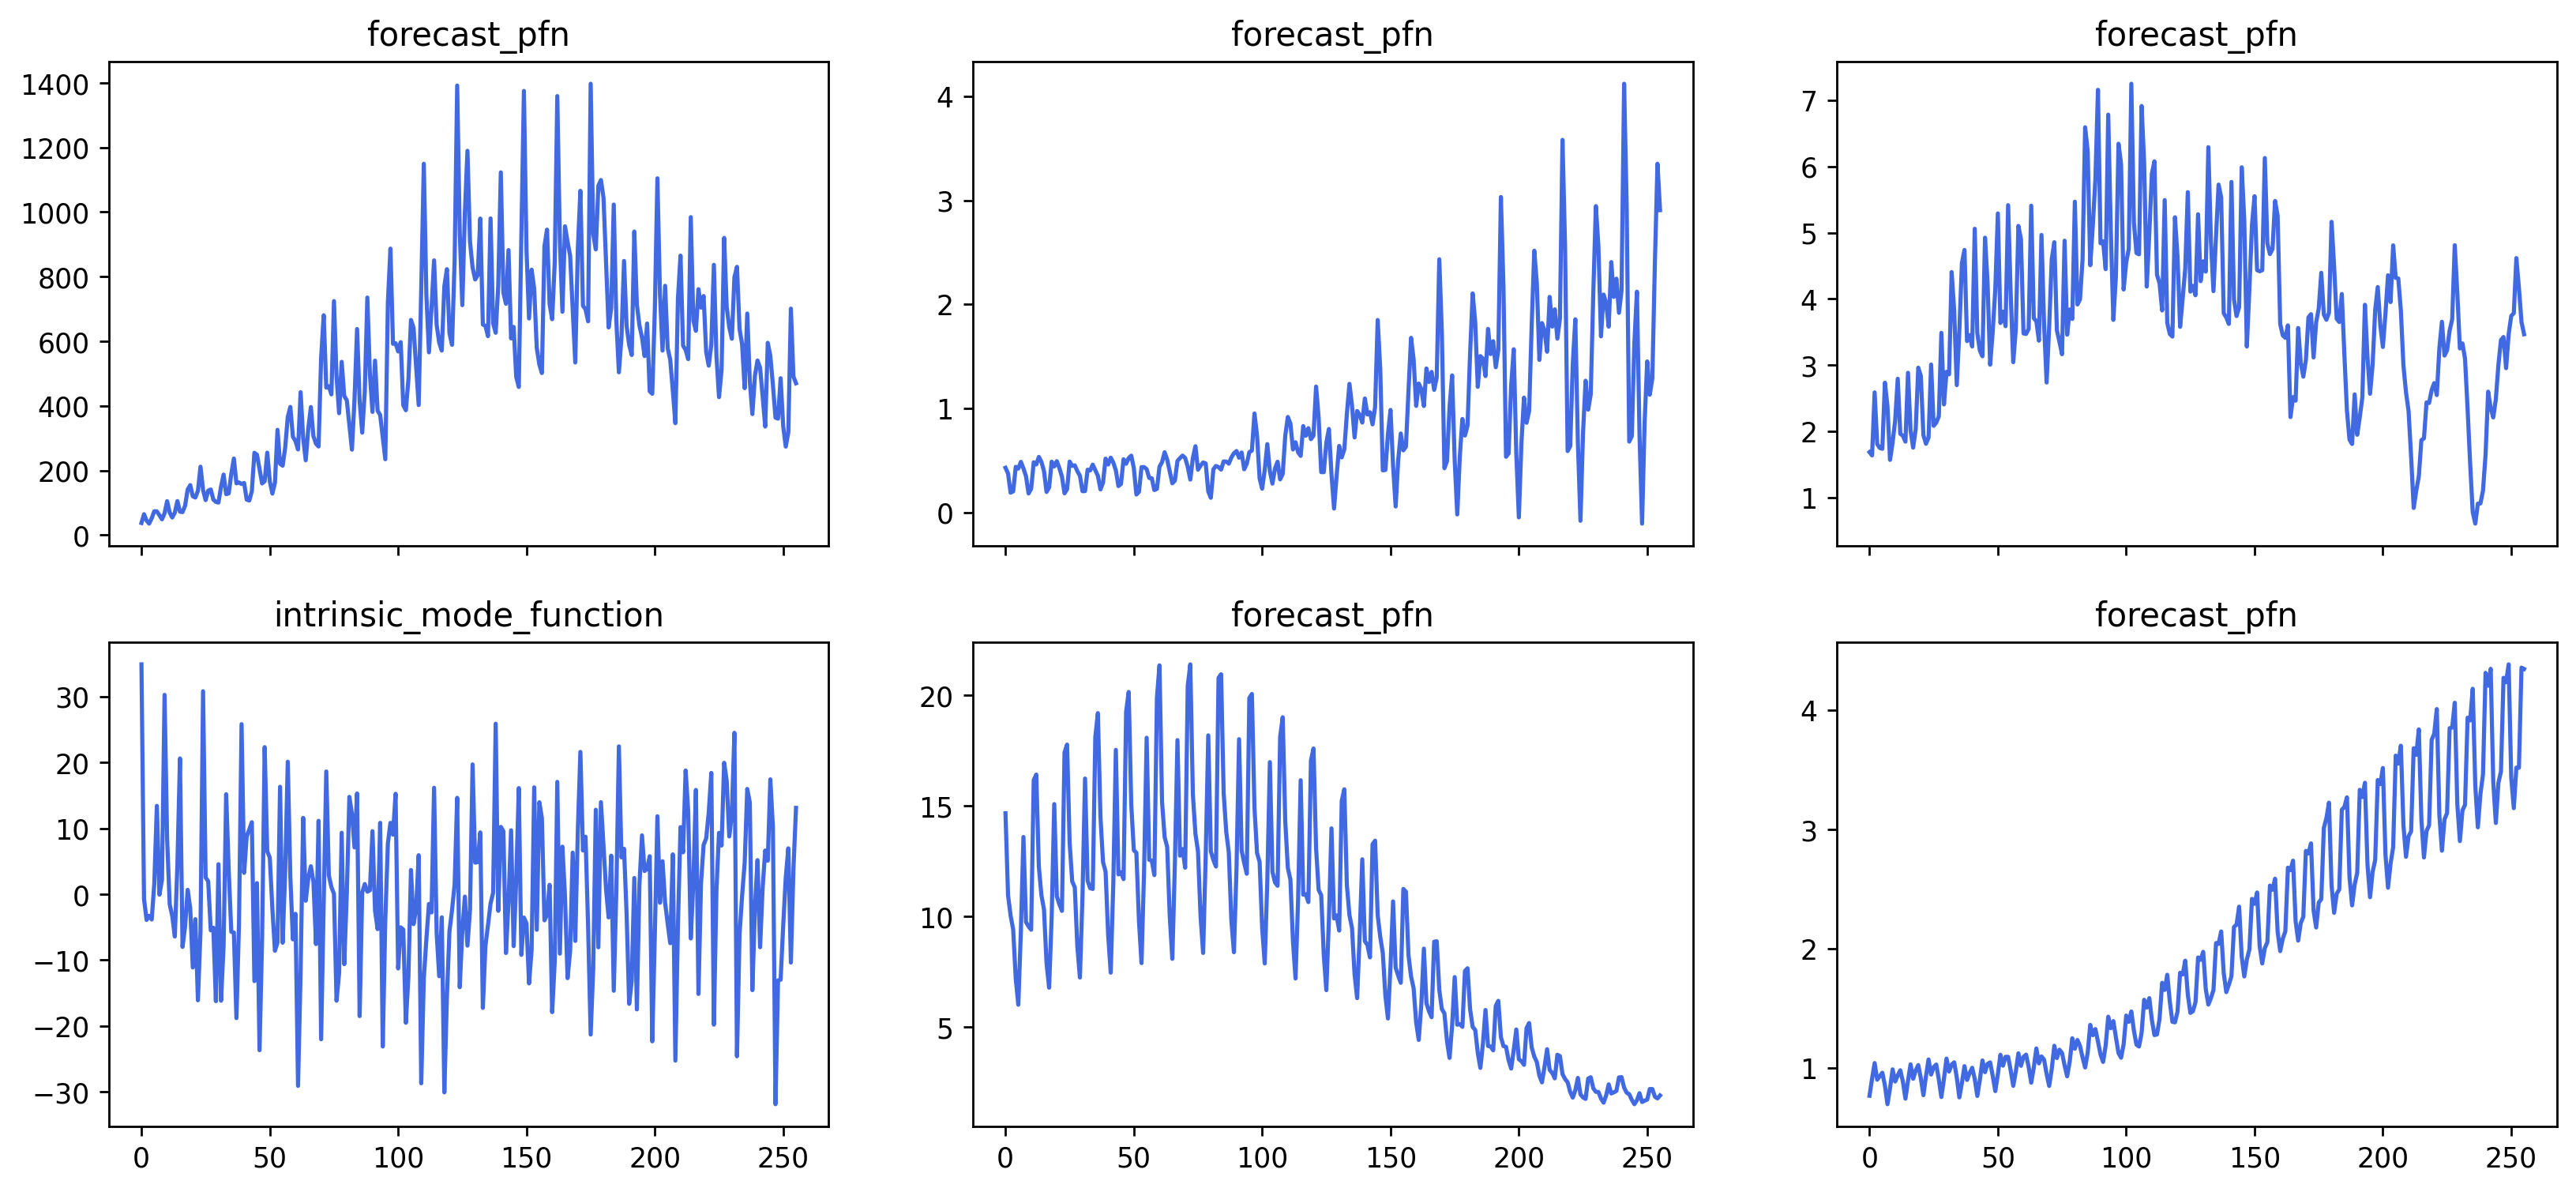

In [5]:
# Generate the New Excitation Time Series
time_series, choice_list = excitation.generate(
    rng=rng, n_inputs_points=256, input_dimension=6, return_choice=True
)

# Visualize the Generated time series data
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 7), dpi=250, sharex=True)

for i in range(2):
    for j in range(3):
        # Plotting the time series
        ax[i, j].plot(time_series[:, i * 3 + j], color="royalblue")
        # Mark the sampling type
        ax[i, j].set_title(choice_list[i * 3 + j])

For each specific method for generating time series data, you can also pass in specific parameters for control and instantiation.

Using the default parameters will meet most basic data generation requirements.

Next we will further demonstrate and analyze this process:

We create the excitation generator for MixedDistribution
We create the excitation generator for ARMA
We create the excitation generator for ForecastPFN
We create the excitation generator for KernelSynth
We create the excitation generator for IntrinsicModeFunction


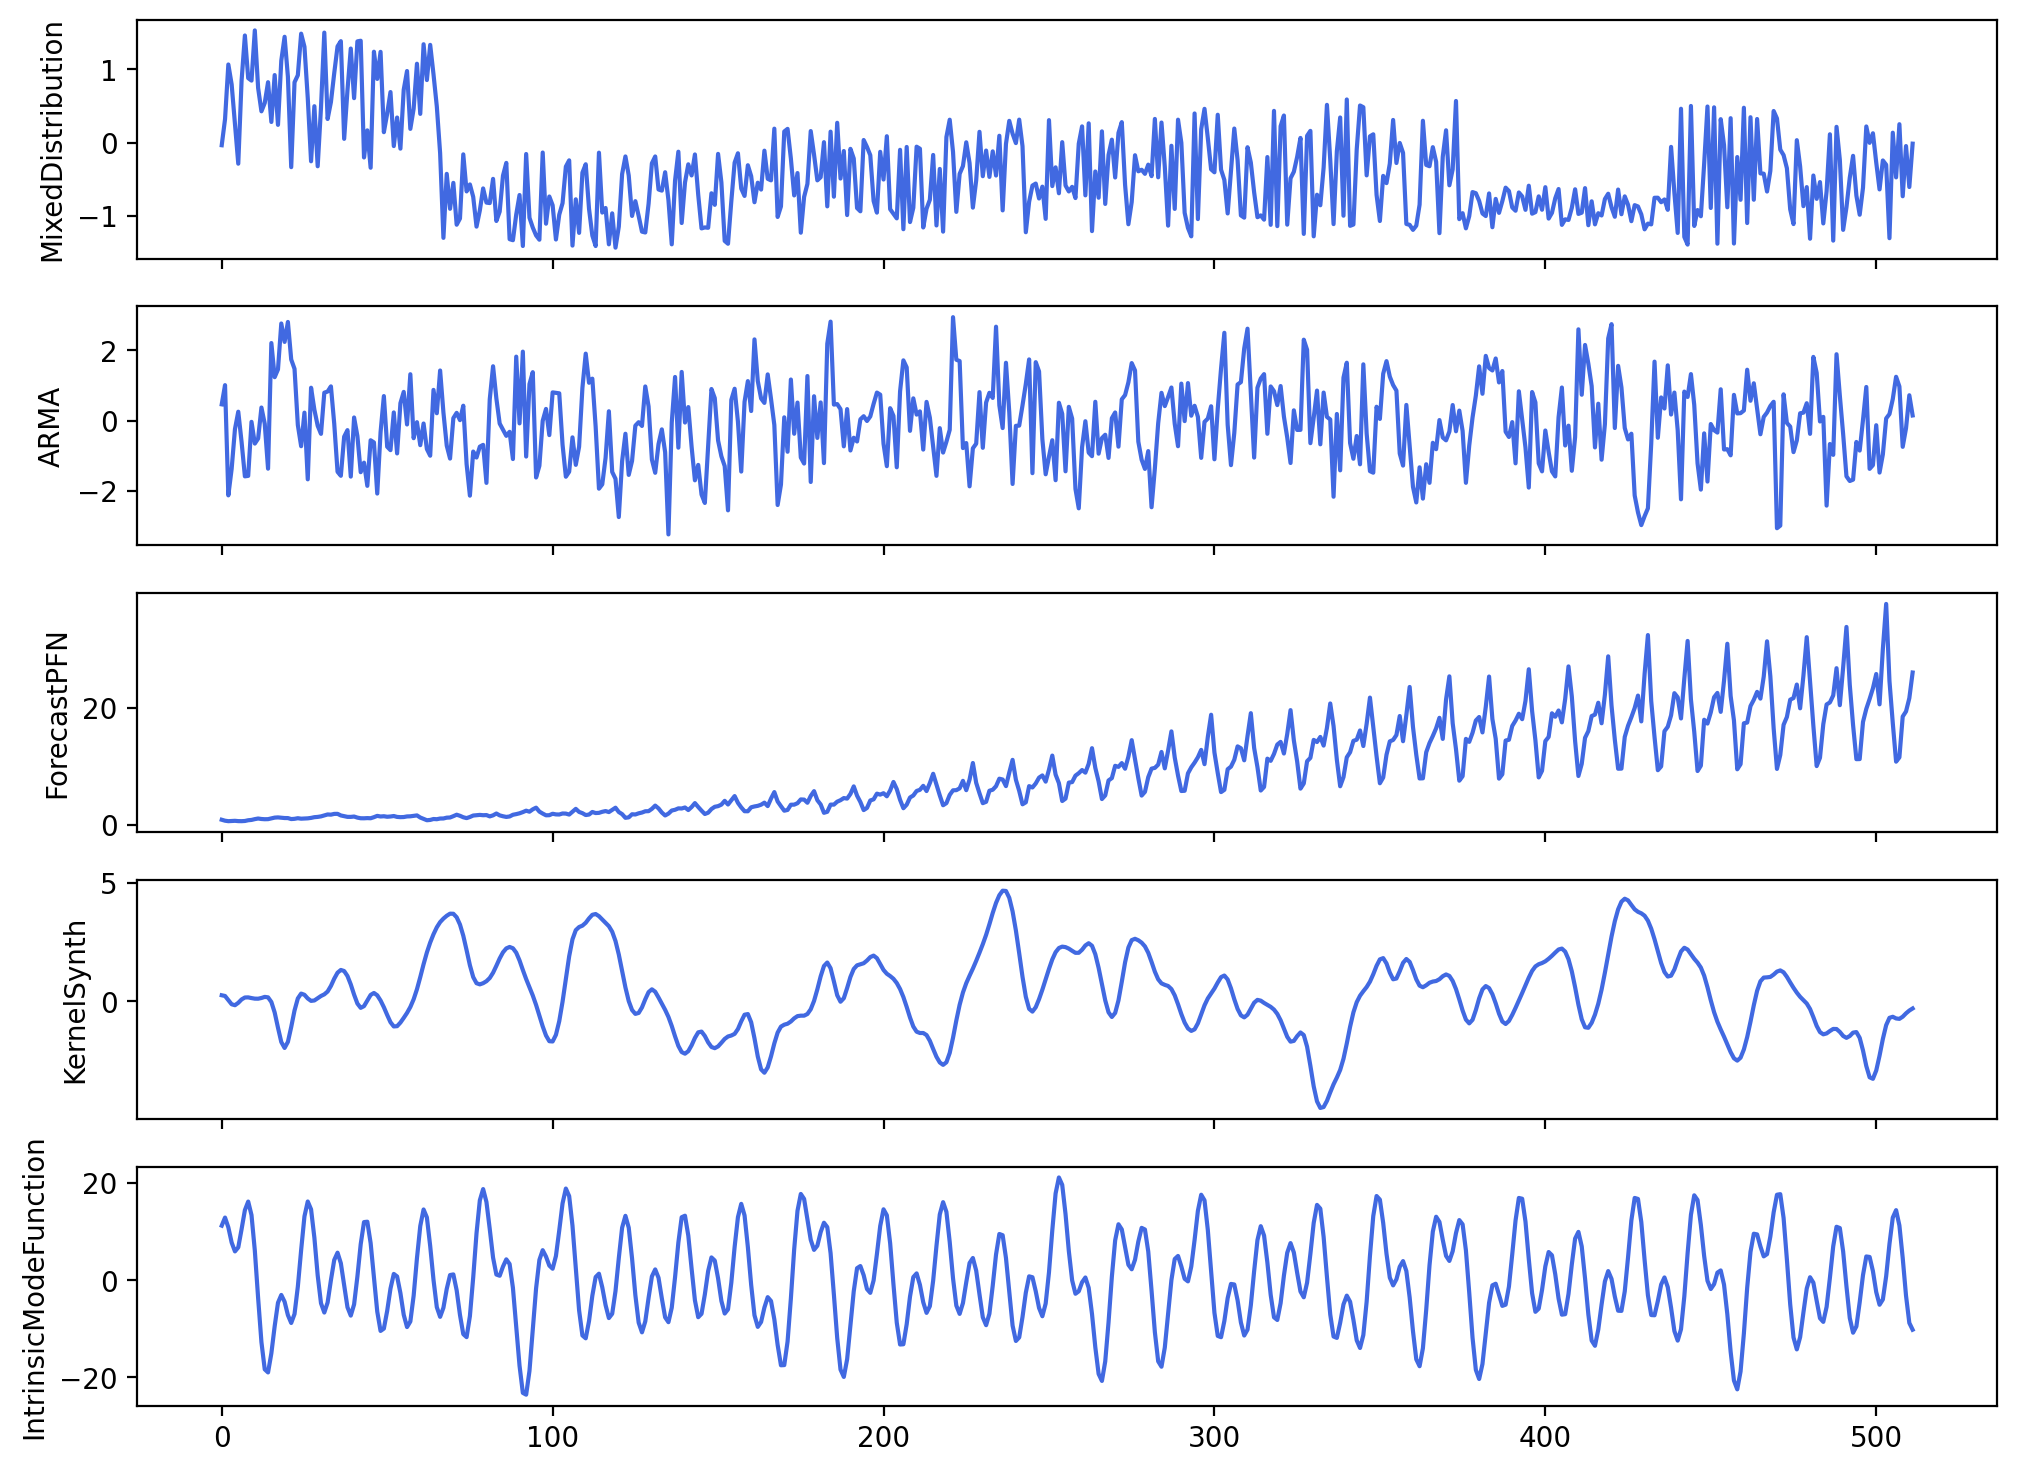

In [8]:
# Create the figure for visualization
fig, ax = plt.subplots(5, ncols=1, figsize=(12, 9), dpi=200, sharex=True)

# Iterate over each different method and instantiate it
for idx, method in enumerate(
    [
        MixedDistribution,
        AutoregressiveMovingAverage,
        ForecastPFN,
        KernelSynth,
        IntrinsicModeFunction,
    ]
):
    # Create directly using completely default parameters
    generator = method()
    # Execute the general `generate` method to generate data
    time_series = generator.generate(
        rng=np.random.RandomState(0), n_inputs_points=512, input_dimension=1
    )
    print("We create the excitation generator for {}".format(str(generator)))

    # Visualize the generate results
    ax[idx].plot(time_series, color="royalblue")

    # Set the y label for the name of excitation
    ax[idx].set_ylabel(str(generator))